In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [3]:
N = np.array([0.924803575275, -0.492448489428, 0.661883336938, -0.192902649201E1, -0.622469309629E-1, 0.349943957581, 0.264857472498, -0.161720005987E1, -0.481395031883, 0.421150636384, -0.161962230825E-1, 0.172100994165, 0.735448924933E-2, 0.1680077305479E-1,-0.107626664179E-2, -0.137318088513E-1, 0.635466899859E-3, 0.304432279419E-2,-0.435762336045E-1,-0.723174889316E-1, 0.389644315272E-1,-0.212201363910E-1,0.408822981509E-2, -0.551990017984E-4, -0.462016716479E-1, -0.300311716011E-2, 0.368825891208E-1,-0.255856846220E-2, 0.896915264558E-2, -0.441513370350E-2,0.133722924858E-2, 0.264832491957E-3, 0.196688194015E2, -0.209115600730E2, 0.167788306989E-1,0.262767566274E4])

i = ([1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 6.0, 6.0, 7.0, 7.0, 8.0, 8.0, 1.0, 2.0, 3.0, 4.0, 5.0, 8.0, 4.0, 5.0, 5.0, 8.0, 3.0, 5.0, 6.0, 9.0, 1.0, 1.0, 3.0, 2.0])

j = ([0.25, 0.875, 0.5, 0.875, 0.375, 0.75, 0.5, 0.75, 2.0, 1.25, 3.5, 1.0, 0.5, 3.0, 0.0, 2.75, 0.75, 2.5, 4.0, 6.0, 6.0, 3.0, 3.0, 6.0, 16.0, 11.0, 15.0, 12.0, 12.0, 7.0, 4.0, 16.0, 0.0, 1.0, 2.0, 3.0])

l = ([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 2, 2, 2, 2])

ϕ = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 15, 25])

β =([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 325, 325, 300, 275])

γ = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.16, 1.16, 1.13, 1.25])


cf1 = 1E-27*(6.022E23) #converts mol/dm^3 to particles/angstrom
#cf1 =1
ρ =  500/(94**3)
ρc = 11.1839*cf1 #particles/angsrom critical density
δ = ρ/ρc #reduced density

Tc = 126.192 #K
#T = np.array([78])
T = np.array([78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,98])#K
τ = Tc/T
αR = []
for cτ in τ:
    C1 = 0.0
    for n in range(6):
        C1 += N[n]*(np.power(δ,i[n]))*(np.power(cτ,j[n])) 

    C2 = 0.0
    for n in range(6,32):
        C2 += N[n]*(np.power(δ,i[n]))*(np.power(cτ,j[n]))*np.exp(-np.power(δ,l[n]))

    C3 = 0.0
    for n in range(32,36):
        C3 += N[n]*(np.power(δ,i[n]))*(np.power(cτ,j[n]))*np.exp((-ϕ[n]*np.power(δ-1,2))-(β[n]*np.power(cτ-γ[n],2)))

    αR.append(C1 + C2 + C3)
αR = np.array(αR)
print(αR)

[-0.29530944 -0.28754363 -0.28024868 -0.27336813 -0.26685538 -0.26067165
 -0.25478439 -0.24916605 -0.24379315 -0.23864546 -0.22895786 -0.22438918
 -0.2199875  -0.21574217 -0.21164366 -0.20768335 -0.20385346 -0.20014687
 -0.19655707 -0.19307809]


In [4]:
cf2 = 1/(6.022E23)*(1.44E20)
#cf2 = 1
h00 = 8670.0*cf2 #kcal/particleK
s00 = 191.5*cf2 #kcal/particleK
R = 8.314510*cf2 #kcal/particleK
T0 = 298.15 #K
p0 = 0.101325*9.86923  #atm
#p0 = 0.101325
ρ0 = p0/(R*T0)
δ0 = ρ0/ρc
Tc = 126.192 #K
τ0 = Tc/T0
print(R)
print(δ0)

0.001988192361341747
250.4797618345003


In [5]:
#q = sum(e)sum(v)sum(j)[ge*gj*(j+2)*exp(-E/kT)]
#for ground state

ge = 1
gnj = 6
ν = 0
jj = 0
ωe = 2358.57*10**8 #inverse angstroms
ωeχe = 14.324*10**8 #inverse angstoms
αe = 0.0017318*10**8 #inverse angstroms
B = 1.99824*10**8 #inverse angrstroms
D = ((4*np.power(B,3))/(np.power(ωe,2)))
βb = D*((8*ωeχe/ωe)-(5*αe/B)-((np.power(αe,2)*ωe/(24*np.power(B,3)))))
k = 1.381*(1.44*np.power(10,20)) #J/K


G0 = ωe*1-ωeχe*np.power(((1/2)),2)
G = ωe*(ν+1)-ωeχe*np.power((ν+(1/2)),2)
F = (B - αe*(ν+(1/2))*(jj*(jj+1)))-((D+βb*(ν+(1/2))))*(np.power(jj,2))*(np.power(jj+1,2))
E = (G-G0)+F

q = ge*gnj*((2*jj)+1)*(E/(k*np.power(T,2)))*np.exp(-E/(k*T))
print(q)

[ -4.61725843e-05  -4.50107146e-05  -4.38921547e-05  -4.28147785e-05
  -4.17765888e-05  -4.07757079e-05  -3.98103694e-05  -3.88789101e-05
  -3.79797631e-05  -3.71114508e-05  -3.54618326e-05  -3.46779673e-05
  -3.39198080e-05  -3.31862430e-05  -3.24762197e-05  -3.17887416e-05
  -3.11228642e-05  -3.04776919e-05  -2.98523750e-05  -2.92461073e-05]


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: RuntimeWarning: invalid value encountered in power


In [6]:
dqT = ge*gnj*((2*jj)+1)*(E/(k*np.power(T,2)))*np.exp(-E/(k*T))
print(dqT)

[ -4.61725843e-05  -4.50107146e-05  -4.38921547e-05  -4.28147785e-05
  -4.17765888e-05  -4.07757079e-05  -3.98103694e-05  -3.88789101e-05
  -3.79797631e-05  -3.71114508e-05  -3.54618326e-05  -3.46779673e-05
  -3.39198080e-05  -3.31862430e-05  -3.24762197e-05  -3.17887416e-05
  -3.11228642e-05  -3.04776919e-05  -2.98523750e-05  -2.92461073e-05]


In [7]:
d2qT2 = ge*gnj*((2*jj)+1)*(E/(k*T))*((E/k*T)-2)*np.exp((-E/(k*T)))
print(d2qT2)

[ 0.02034715  0.02025582  0.02016677  0.02007993  0.0199952   0.01991252
  0.0198318   0.01975299  0.01967601  0.0196008   0.01945546  0.01938521
  0.0193165   0.01924929  0.01918353  0.01911917  0.01905616  0.01899446
  0.01893404  0.01887485]


In [8]:
cp0 = R*((5/2)+((2*T/q)*np.power((dqT),2))+((np.power(T,2)/q)*(d2qT2)))
#print(cp0)
#print(R)
def integrand1(t,cp0):
    return cp0/np.power(t,2)
def integrand2(t,cp0):
    return cp0/t

α0 = []
for ii, cτ in enumerate(τ):
    cα0 = ((h00*cτ)/(R*Tc))-(s00/R)-1+np.log((δ*τ0)/(δ0*cτ))-((cτ/R)*integrate.quad(integrand1,τ0,cτ,args=(cp0[ii]))[0])+((1/R)*integrate.quad(integrand2,τ0,cτ,args=cp0[ii])[0])
    α0.append(cα0)
α0 = np.array(α0)
print(α0)

[ 3972114.18662473  4060919.0036601   4149997.66767725  4239317.45212605
  4328845.51963967  4418548.93413328  4508394.67277676  4598349.6378439
  4688380.66844052  4778454.55211401  4958597.83993354  5048600.66425185
  5138513.20441597  5228302.1603281   5317934.24762189  5407376.20850245
  5496594.82248459  5585556.91703095  5674229.37809198  5762579.16054949]


α = [ 3972113.89131529  4060918.71611647  4149997.38742857  4239317.17875793
  4328845.25278429  4418548.67346163  4508394.41799237  4598349.38867785
  4688380.42464737  4778454.31346855  4958597.61097567  5048600.43986267
  5138512.98442847  5228301.94458593  5317934.03597823  5407376.0008191
  5496594.61863113  5585556.71688409  5674229.18153492  5762578.9674714 ]

 a = [  615991.46677321   637837.11814159   660079.4484219    682714.82060102
   705739.31933133   729148.75182583   752938.64887653   777104.26599473
   801640.58467193   826542.31376011   877419.48448673   903382.99470014
   929688.05605094   956328.03898928   983296.05204596  1010584.94401473
  1038187.30624468  1066095.4750416   1094301.53417732  1122797.31750601]


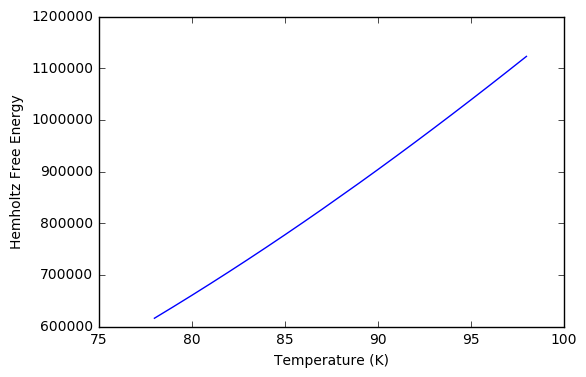

In [9]:
α = α0 + αR #J/mol
print('α =', α)

a = R*T*α
print('\n a =', a)

plt.plot(T,a)
plt.xlabel('Temperature (K)')
plt.ylabel('Hemholtz Free Energy')
plt.show()

In [13]:
## to get pressure from a, P = -(δF/δV) for constant T

V = (94**3) #angrstroms^3
mol = 500 #particles
Vc = 74239.66 #angstroms^3

da0 = -R*T/V
daR = []
for nτ,cτ in enumerate(τ):
    daR1 = 0.0
    for n in range(6):
        daR1 += -i[n]*(N[n]*(cτ**j[n])*(Vc**i[n]))*V**(-i[n]-1)
    
    daR2 = 0.0
    #for n in range(6,32):
    #    daR2 += ((-l[n]*(N[n]*(cτ**j[n])*(Vc**i[n])))/V**(i[n]+1))*((Vc/V)**l[n])*np.exp((-Vc/V)**l[n])-(i[n]*(N[n]*(cτ**j[n])*(Vc**i[n]))/(V**(i[n]+1))*np.exp((-Vc/V)**l[n]))
    #print(daR2)
    daR3 = 0.0
    #for n in range(32,36):
     #   daR3 += (((2*(N[n]*(cτ**j[n])*(Vc**i[n]))*Vc*ϕ[n])/(V**(i[n]+2)))*((Vc/V)-1)*np.exp(-ϕ[n]*(((Vc/V)-1)**2)-β[n]*(cτ-γ[n]**2)))-(i[n]*(N[n]*(cτ**j[n])*(Vc**i[n]))*(V**(-i[n]+1)))*np.exp(-ϕ[n]*(((Vc/V)-1)**2)-β[n]*(cτ-γ[n]**2))
    daR.append((R*T[nτ])*(daR1 + daR2 + daR3))
                                                                                                                                          
daR = np.array(daR)

print('da0 ', da0)
print('daR ', daR)
P = da0 + daR
#print(P)                                                                                                                                   

da0  [ -1.86710801e-07  -1.89104530e-07  -1.91498258e-07  -1.93891986e-07
  -1.96285714e-07  -1.98679442e-07  -2.01073171e-07  -2.03466899e-07
  -2.05860627e-07  -2.08254355e-07  -2.13041812e-07  -2.15435540e-07
  -2.17829268e-07  -2.20222996e-07  -2.22616725e-07  -2.25010453e-07
  -2.27404181e-07  -2.29797909e-07  -2.32191638e-07  -2.34585366e-07]
daR  [  1.19832378e-09   1.04869588e-09   8.99328462e-10   7.50219989e-10
   6.01368912e-10   4.52773672e-10   3.04432692e-10   1.56344389e-10
   8.50717324e-12  -1.39080553e-10  -4.33513934e-10  -5.80362795e-10
  -7.26968570e-10  -8.73332860e-10  -1.01945726e-09  -1.16534336e-09
  -1.31099276e-09  -1.45640702e-09  -1.60158774e-09  -1.74653646e-09]


In [32]:
for cτ in τ:
    #daR2 = 0.0
    for n in range(6,32):
        a1 = (-l[n]*(N[n]*(cτ**j[n])*(Vc**i[n])))/(V**(i[n]+1))
        a2 = (Vc/V)**l[n]
        a3 = np.exp(-Vc/V)*l[n]
        a4 = (-i[n]*(N[n]*(cτ**j[n])*(Vc**i[n]))/(V**i[n]+1))
    print('1*2', a1*a2 )
    print('4*5', a4*a2)

    

1*2 -inf
4*5 -2.29584588359e+148
1*2 -inf
4*5 -1.87250468778e+148
1*2 -inf
4*5 -1.53114592336e+148
1*2 -inf
4*5 -1.25515127681e+148
1*2 -inf
4*5 -1.03141807081e+148
1*2 -inf
4*5 -8.49585117786e+147
1*2 -inf
4*5 -7.01435589343e+147
1*2 -inf
4*5 -5.80434960573e+147
1*2 -inf
4*5 -4.81372365037e+147
1*2 -inf
4*5 -4.00081373383e+147
1*2 -inf
4*5 -2.78109784118e+147
1*2 -inf
4*5 -2.32582065599e+147
1*2 -inf
4*5 -1.94892038023e+147
1*2 -inf
4*5 -1.63625556544e+147
1*2 -inf
4*5 -1.3763509831e+147
1*2 -inf
4*5 -1.15987374194e+147
1*2 -inf
4*5 -9.79216425216e+146
1*2 -inf
4*5 -8.28164567668e+146
1*2 -inf
4*5 -7.01630768804e+146
1*2 -inf
4*5 -5.95441586589e+146


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in double_scalars
